In [1]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from matplotlib.pyplot import specgram
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation 
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix
from keras import regularizers
import os
import pandas as pd
import librosa
import glob 

Using TensorFlow backend.


In [2]:
mylist= os.listdir('trainingfiles/')

In [3]:
print(mylist[600])

02-0339.wav


In [4]:
print(mylist[600][0:2])

02


In [5]:
data, sampling_rate = librosa.load('trainingfiles/02-0109.wav')

Populating the interactive namespace from numpy and matplotlib


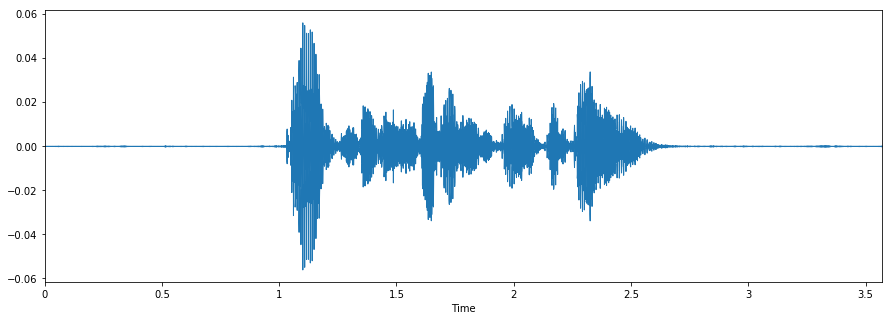

In [6]:
%pylab inline

plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

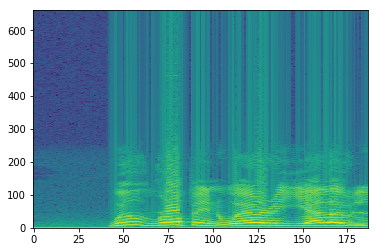

In [7]:
import matplotlib.pyplot as plt
import scipy.io.wavfile
import numpy as np
import sys


sr,x = scipy.io.wavfile.read('C:/Users/wesac/PycharmProjects/INNO Python Speech Emotion Analysis/plot/f10 (02).wav')

## Parameters: 10ms step, 30ms window
nstep = int(sr * 0.01)
nwin  = int(sr * 0.03)
nfft = nwin

window = np.hamming(nwin)

## will take windows x[n1:n2].  generate
## and loop over n2 such that all frames
## fit within the waveform
nn = range(nwin, len(x), nstep)

X = np.zeros( (len(nn), nfft//2) )

for i,n in enumerate(nn):
    xseg = x[n-nwin:n]
    z = np.fft.fft(window * xseg, nfft)
    X[i,:] = np.log(np.abs(z[:nfft//2]))

plt.imshow(X.T, interpolation='nearest',
    origin='lower',
    aspect='auto')

plt.show()

In [8]:
feeling_list=[]
check = []
for item in mylist:
    
    if item[0:2] == '01' and int(item[-5])%2==1:
#         feeling_list.append('male_positive')
        feeling_list.append('positive')
    elif item[0:2] == '01' and int(item[-5])%2==0:
#         feeling_list.append('female_positive')
        feeling_list.append('positive')
    elif item[0:2] == '02' and int(item[-5])%2==1:
        feeling_list.append('positive')
#         feeling_list.append('male_positive')
    elif item[0:2] == '02' and int(item[-5])%2==0:
        feeling_list.append('positive')
#         feeling_list.append('female_positive')
    elif item[0:2] == '03' and int(item[-5])%2==1:
        feeling_list.append('negative')
#         feeling_list.append('male_negative')
    elif item[0:2] == '03' and int(item[-5])%2==0:
        feeling_list.append('negative')
#         feeling_list.append('female_negative')

#     if item[6:8]=='01'and int(item[18:-4])%2==0:
#     if item[6:-16]=='02' 
#         feeling_list.append('female_calm')
#     elif item[6:-16]=='02' and int(item[18:-4])%2==1:
#         feeling_list.append('male_calm')
#     elif item[6:-16]=='03' and int(item[18:-4])%2==0:
#         feeling_list.append('female_happy')
#     elif item[6:-16]=='03' and int(item[18:-4])%2==1:
#         feeling_list.append('male_happy')
#     elif item[6:-16]=='04' and int(item[18:-4])%2==0:
#         feeling_list.append('female_sad')
#     elif item[6:-16]=='04' and int(item[18:-4])%2==1:
#         feeling_list.append('male_sad')
#     elif item[6:-16]=='05' and int(item[18:-4])%2==0:
#         feeling_list.append('female_angry')
#     elif item[6:-16]=='05' and int(item[18:-4])%2==1:
#         feeling_list.append('male_angry')
#     elif item[6:-16]=='06' and int(item[18:-4])%2==0:
#         feeling_list.append('female_fearful')
#     elif item[6:-16]=='06' and int(item[18:-4])%2==1:
#         feeling_list.append('male_fearful')
#     elif item[:1]=='a':
#         feeling_list.append('male_angry')
#     elif item[:1]=='f':
#         feeling_list.append('male_fearful')
#     elif item[:1]=='h':
#         feeling_list.append('male_happy')
#     #elif item[:1]=='n':
#         #feeling_list.append('neutral')
#     elif item[:2]=='sa':
#         feeling_list.append('male_sad')
# for item in mylist:
#     if item[6:-16]=='02' and int(item[18:-4])%2==0:

In [9]:
labels = pd.DataFrame(feeling_list)

In [10]:
labels[:10]

,0
0,positive
1,positive
2,positive
3,positive
4,positive
5,positive
6,positive
7,positive
8,positive
9,positive


In [11]:
df = pd.DataFrame(columns=['feature'])
bookmark=0
for index,y in enumerate(mylist):
#     if mylist[index][6:-16]!='01' and mylist[index][6:-16]!='07' and mylist[index][6:-16]!='08' and mylist[index][:2]!='su' and mylist[index][:1]!='n' and mylist[index][:1]!='d':
        X, sample_rate = librosa.load('trainingfiles/'+y, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
        sample_rate = np.array(sample_rate)
        mfccs = np.mean(librosa.feature.mfcc(y=X, 
                                            sr=sample_rate, 
                                            n_mfcc=13),
                        axis=0)
        feature = mfccs
        #[float(i) for i in feature]
        #feature1=feature[:135]
        df.loc[bookmark] = [feature]
        bookmark=bookmark+1        

In [12]:
df[:5]

,feature
0,"[-63.311077603854685, -63.07248387824985, -63...."
1,"[-48.981466375904574, -47.696596854861, -47.20..."
2,"[-61.040763343199394, -61.040763343199394, -61..."
3,"[-59.70955258415339, -60.011673716507794, -59...."
4,"[-60.41848093627181, -60.41848093627181, -60.4..."


In [13]:
df3 = pd.DataFrame(df['feature'].values.tolist())

In [14]:
newdf = pd.concat([df3,labels], axis=1)

In [15]:
rnewdf = newdf.rename(index=str, columns={"0": "label"})

In [16]:
rnewdf[:5]

,0,1,2,3,4,5,6,7,8,9,...,207,208,209,210,211,212,213,214,215,0
0,-63.311078,-63.072484,-63.412433,-63.796762,-63.581991,-58.921211,-57.955046,-61.224968,-63.782931,-63.796762,...,-62.505021,-59.518870,-60.482347,-58.338576,-58.965295,-63.520669,-63.769352,-63.829853,-62.814244,positive
1,-48.981466,-47.696597,-47.206740,-48.770675,-46.975942,-46.064501,-45.844486,-45.215074,-46.174046,-46.502808,...,-48.041735,-47.311513,-48.412880,-48.155535,-44.662251,-45.211056,-47.680673,-48.981466,-48.981466,positive
2,-61.040763,-61.040763,-61.040763,-61.040763,-61.040763,-61.040763,-61.040763,-61.040763,-61.040763,-61.049199,...,-53.759278,-53.623854,-55.661298,-53.975629,-54.425544,-56.314807,-56.524213,-54.678987,-55.443385,positive
3,-59.709553,-60.011674,-59.803761,-56.803096,-55.476826,-56.623761,-58.857121,-60.852016,-59.201946,-56.501222,...,-35.847700,-35.395162,-37.004206,-38.270817,-38.170345,-40.558376,-41.668358,-28.840480,-22.668736,positive
4,-60.418481,-60.418481,-60.418481,-60.418481,-60.418481,-60.418481,-60.418481,-60.418481,-60.418481,-60.418481,...,-56.310962,-57.144515,-57.759200,-56.183904,-56.088949,-57.717637,-58.577387,-58.642831,-58.262720,positive


In [17]:
from sklearn.utils import shuffle
rnewdf = shuffle(newdf)
rnewdf[:10]

,0,1,2,3,4,5,6,7,8,9,...,207,208,209,210,211,212,213,214,215,0
828,-49.019580,-49.019580,-49.019580,-49.019580,-49.019580,-49.019580,-49.019580,-49.019580,-49.019580,-49.019580,...,-28.205102,-31.325385,-32.528659,-32.473678,-34.145162,-35.651772,-36.265874,-20.035678,-12.907034,negative
783,-46.195841,-45.249621,-44.862480,-44.635377,-44.866670,-45.168401,-45.227388,-45.197345,-45.096754,-45.002396,...,-36.567955,-35.479652,-35.930510,-37.780575,-37.847867,-36.824868,-37.508000,-38.698615,-38.920346,negative
598,-37.497485,-40.120203,-41.299181,-42.205225,-42.010662,-42.347005,-41.992263,-40.100020,-38.743483,-38.762679,...,-23.336383,-23.641674,-24.689784,-27.675552,-29.822065,-30.353207,-30.983005,-29.849928,-29.777451,positive
238,-22.798219,-21.489023,-14.221887,-7.221884,-5.442241,-9.202951,-13.894522,-15.447908,-15.474218,-18.446309,...,-15.354271,-14.378084,-13.162900,-14.181709,-13.805319,-13.774423,-16.267087,-18.697696,-18.831461,positive
753,-69.258846,-69.428823,-71.879325,-73.146200,-73.146200,-73.146200,-73.146200,-73.146200,-73.146200,-73.146200,...,-42.494374,-42.725137,-42.157531,-43.011017,-43.832175,-43.092937,-44.350963,-45.391413,-43.063839,positive
516,-51.725560,-54.124322,-55.544334,-54.201736,-55.323090,-54.073407,-52.928944,-52.014225,-50.625279,-49.931809,...,-56.343736,-58.966647,-60.412907,-57.063297,-56.789003,-58.956166,-66.689059,-68.334259,-64.642337,positive
536,-45.593970,-45.288887,-43.909746,-43.639006,-44.616296,-43.998122,-43.588965,-44.078374,-43.900877,-42.735786,...,-40.460424,-40.520291,-40.441986,-41.478265,-42.777435,-41.823463,-41.062489,-40.644083,-42.000237,positive
242,-14.181581,-13.251003,-9.019861,-5.760112,-7.362942,-12.386311,-12.821856,-11.084353,-7.972977,-8.296486,...,-8.359243,-8.252011,-9.494794,-8.874112,-8.231724,-8.313557,-9.169389,-3.548983,1.739346,positive
1072,-39.489356,-38.023956,-39.001701,-40.942233,-40.963170,-41.103788,-40.505717,-40.580599,-41.587074,-41.344675,...,-7.962721,-8.033972,-8.866759,-8.588018,-8.294267,-8.804217,-11.420956,-14.603561,-15.842317,negative
98,-40.588497,-40.581083,-40.605576,-40.649172,-40.645645,-40.654913,-40.655991,-40.645635,-40.632103,-40.652580,...,-37.957702,-37.451445,-39.119533,-39.735301,-40.298764,-40.656857,-40.656857,-40.656857,-40.656857,positive


In [18]:
rnewdf=rnewdf.fillna(0)

In [19]:
newdf1 = np.random.rand(len(rnewdf)) < 0.8
train = rnewdf[newdf1]
test = rnewdf[~newdf1]

In [20]:
train[250:260]

,0,1,2,3,4,5,6,7,8,9,...,207,208,209,210,211,212,213,214,215,0
658,-21.644947,-20.019642,-19.462743,-19.360642,-18.698728,-18.869120,-18.862553,-9.286179,-4.235848,-3.455603,...,-5.613788,-6.823324,-8.480320,-11.129561,-13.569237,-17.003764,-20.993395,-22.041384,-20.440006,positive
708,-44.583485,-44.583485,-44.583485,-44.583485,-44.583485,-44.583485,-44.583485,-44.583485,-44.583485,-44.583485,...,-28.556945,-28.243537,-28.105381,-29.438886,-29.824134,-28.766652,-26.827427,-26.321059,-29.946138,positive
298,-53.141989,-52.674986,-50.214223,-50.819006,-54.603820,-52.255261,-50.683798,-52.724802,-49.598236,-51.657570,...,-47.976356,-47.613287,-48.414052,-49.194751,-50.277707,-52.465255,-54.078607,-56.517974,-57.023303,positive
842,-46.445923,-46.445923,-46.445923,-46.445923,-46.445923,-46.445923,-46.445923,-46.445923,-46.310959,-46.445923,...,-46.429402,-46.445923,-46.445923,-46.445923,-46.324052,-45.165305,-44.805501,-44.915777,-46.010188,negative
243,-33.842588,-34.295748,-34.173752,-33.575832,-35.710512,-35.358639,-35.197065,-33.873573,-33.490176,-33.330555,...,-14.400037,-14.803994,-15.043152,-16.103823,-15.927802,-15.567900,-14.268187,-15.384337,-15.562654,positive
706,-51.079833,-51.018193,-52.111448,-53.815914,-50.711353,-49.507688,-50.742249,-51.723229,-51.633002,-52.000904,...,-38.565667,-39.543277,-39.507603,-39.206800,-38.964500,-40.819597,-41.819613,-42.651650,-38.605964,positive
279,-2.294309,-7.213792,-21.207827,-20.373865,-21.454933,-22.806397,-23.222867,-19.101007,-15.214135,-15.961773,...,-22.452670,-25.309486,-26.321181,-24.969088,-22.620084,-21.646857,-22.212172,-23.145416,-17.379493,positive
831,-43.530727,-44.456975,-45.279304,-45.535551,-45.075518,-45.132922,-44.698961,-45.068606,-45.376202,-45.128272,...,-16.553414,-15.125620,-18.193862,-21.654692,-22.878497,-21.776065,-21.396795,-14.430777,-5.902514,negative
176,-52.575647,-52.575647,-52.575647,-52.499734,-51.881620,-52.083540,-52.588447,-52.620529,-52.710722,-52.657048,...,-47.047207,-49.977909,-47.705178,-47.412130,-47.180997,-48.149784,-49.116703,-48.646280,-51.558731,positive
441,-66.224575,-66.224575,-66.224575,-66.224575,-66.224575,-66.224575,-66.224575,-66.224575,-66.224575,-66.224575,...,-36.320461,-36.561987,-36.246012,-35.017437,-35.637680,-36.790985,-39.443554,-33.025143,-26.604508,positive


In [21]:
trainfeatures = train.iloc[:, :-1]
trainlabel = train.iloc[:, -1:]
testfeatures = test.iloc[:, :-1]
testlabel = test.iloc[:, -1:]

In [22]:
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

X_train = np.array(trainfeatures)

In [23]:
y_train = np.array(trainlabel)

In [24]:
X_test = np.array(testfeatures)

In [25]:
y_test = np.array(testlabel)

In [26]:
lb = LabelEncoder()

In [27]:
y_train = np_utils.to_categorical(lb.fit_transform(ravel(y_train)))

In [28]:
y_test = np_utils.to_categorical(lb.fit_transform(ravel(y_test)))

In [29]:
y_train

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [30]:
X_train.shape

(983, 216)

In [31]:
x_traincnn =np.expand_dims(X_train, axis=2)
x_testcnn= np.expand_dims(X_test, axis=2)

In [32]:
from keras import optimizers
model = models.Sequential()

model.add(layers.Conv1D(256, 5,padding='same', activation='relu', input_shape=(216,1)))
model.add(layers.Conv1D(128, 5,padding='same', activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.MaxPooling1D(pool_size=(8)))
model.add(layers.Conv1D(128, 5,padding='same', activation='relu'))
model.add(layers.Conv1D(128, 5,padding='same', activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(2))
model.add(layers.Activation('softmax'))
opt = tf.keras.optimizers.RMSprop(lr=0.00001, decay=1e-6)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 216, 256)          1536      
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 216, 128)          163968    
_________________________________________________________________
dropout (Dropout)            (None, 216, 128)          0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 27, 128)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 27, 128)           82048     
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 27, 128)           82048     
_________________________________________________________________
flatten (Flatten)            (None, 3456)              0

In [34]:
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

In [35]:
cnnhistory=model.fit(x_traincnn, y_train, batch_size=16, epochs=350, validation_data=(x_testcnn, y_test))

Train on 983 samples, validate on 248 samples
Epoch 1/350
983/983 [==============================] - 5s 5ms/sample - loss: 0.6756 - acc: 0.6409 - val_loss: 0.6634 - val_acc: 0.5927
Epoch 2/350
983/983 [==============================] - 4s 4ms/sample - loss: 0.6318 - acc: 0.6501 - val_loss: 0.6562 - val_acc: 0.5887
Epoch 3/350
983/983 [==============================] - 4s 5ms/sample - loss: 0.6117 - acc: 0.6521 - val_loss: 0.6445 - val_acc: 0.5927
Epoch 4/350
983/983 [==============================] - 5s 5ms/sample - loss: 0.5989 - acc: 0.6704 - val_loss: 0.6369 - val_acc: 0.6008
Epoch 5/350
983/983 [==============================] - 4s 5ms/sample - loss: 0.5977 - acc: 0.6734 - val_loss: 0.6322 - val_acc: 0.6250
Epoch 6/350
983/983 [==============================] - 5s 5ms/sample - loss: 0.5929 - acc: 0.6714 - val_loss: 0.6435 - val_acc: 0.6129
Epoch 7/350
983/983 [==============================] - 5s 5ms/sample - loss: 0.5852 - acc: 0.6714 - val_loss: 0.6285 - val_acc: 0.6371
Epoch 8/3

Epoch 61/350
983/983 [==============================] - 5s 5ms/sample - loss: 0.4955 - acc: 0.7569 - val_loss: 0.6001 - val_acc: 0.6774
Epoch 62/350
983/983 [==============================] - 5s 5ms/sample - loss: 0.4966 - acc: 0.7589 - val_loss: 0.6011 - val_acc: 0.6573
Epoch 63/350
983/983 [==============================] - 5s 5ms/sample - loss: 0.4890 - acc: 0.7721 - val_loss: 0.6609 - val_acc: 0.6210
Epoch 64/350
983/983 [==============================] - 5s 5ms/sample - loss: 0.4932 - acc: 0.7701 - val_loss: 0.6065 - val_acc: 0.6573
Epoch 65/350
983/983 [==============================] - 5s 5ms/sample - loss: 0.4923 - acc: 0.7731 - val_loss: 0.6168 - val_acc: 0.6573
Epoch 66/350
983/983 [==============================] - 5s 6ms/sample - loss: 0.4878 - acc: 0.7792 - val_loss: 0.6355 - val_acc: 0.6331
Epoch 67/350
983/983 [==============================] - 5s 5ms/sample - loss: 0.4851 - acc: 0.7813 - val_loss: 0.6123 - val_acc: 0.6492
Epoch 68/350
983/983 [==========================

983/983 [==============================] - 5s 5ms/sample - loss: 0.4117 - acc: 0.8332 - val_loss: 0.6138 - val_acc: 0.6613
Epoch 122/350
983/983 [==============================] - 4s 5ms/sample - loss: 0.4070 - acc: 0.8352 - val_loss: 0.6115 - val_acc: 0.6613
Epoch 123/350
983/983 [==============================] - 4s 4ms/sample - loss: 0.4062 - acc: 0.8352 - val_loss: 0.6590 - val_acc: 0.6331
Epoch 124/350
983/983 [==============================] - 4s 4ms/sample - loss: 0.4094 - acc: 0.8383 - val_loss: 0.6097 - val_acc: 0.6532
Epoch 125/350
983/983 [==============================] - 4s 4ms/sample - loss: 0.4068 - acc: 0.8383 - val_loss: 0.6120 - val_acc: 0.6573
Epoch 126/350
983/983 [==============================] - 4s 4ms/sample - loss: 0.4053 - acc: 0.8383 - val_loss: 0.6287 - val_acc: 0.6371
Epoch 127/350
983/983 [==============================] - 6s 6ms/sample - loss: 0.4009 - acc: 0.8413 - val_loss: 0.6155 - val_acc: 0.6492
Epoch 128/350
983/983 [==============================] 

Epoch 181/350
983/983 [==============================] - 4s 4ms/sample - loss: 0.3341 - acc: 0.8779 - val_loss: 0.6358 - val_acc: 0.6573
Epoch 182/350
983/983 [==============================] - 4s 4ms/sample - loss: 0.3343 - acc: 0.8779 - val_loss: 0.6426 - val_acc: 0.6492
Epoch 183/350
983/983 [==============================] - 6s 6ms/sample - loss: 0.3340 - acc: 0.8759 - val_loss: 0.6389 - val_acc: 0.6371
Epoch 184/350
983/983 [==============================] - 6s 6ms/sample - loss: 0.3312 - acc: 0.8728 - val_loss: 0.6472 - val_acc: 0.6452
Epoch 185/350
983/983 [==============================] - 6s 6ms/sample - loss: 0.3289 - acc: 0.8830 - val_loss: 0.6494 - val_acc: 0.6411
Epoch 186/350
983/983 [==============================] - 6s 6ms/sample - loss: 0.3278 - acc: 0.8840 - val_loss: 0.6617 - val_acc: 0.6532
Epoch 187/350
983/983 [==============================] - 6s 6ms/sample - loss: 0.3290 - acc: 0.8810 - val_loss: 0.6583 - val_acc: 0.6492
Epoch 188/350
983/983 [==================

Epoch 241/350
983/983 [==============================] - 6s 6ms/sample - loss: 0.2715 - acc: 0.9003 - val_loss: 0.6824 - val_acc: 0.6411
Epoch 242/350
983/983 [==============================] - 6s 6ms/sample - loss: 0.2673 - acc: 0.9034 - val_loss: 0.6795 - val_acc: 0.6411
Epoch 243/350
983/983 [==============================] - 4s 4ms/sample - loss: 0.2636 - acc: 0.9084 - val_loss: 0.6771 - val_acc: 0.6532
Epoch 244/350
983/983 [==============================] - 6s 6ms/sample - loss: 0.2667 - acc: 0.9095 - val_loss: 0.6793 - val_acc: 0.6452
Epoch 245/350
983/983 [==============================] - 6s 6ms/sample - loss: 0.2662 - acc: 0.9003 - val_loss: 0.7060 - val_acc: 0.6411
Epoch 246/350
983/983 [==============================] - 6s 6ms/sample - loss: 0.2637 - acc: 0.9074 - val_loss: 0.7126 - val_acc: 0.6371
Epoch 247/350
983/983 [==============================] - 4s 4ms/sample - loss: 0.2633 - acc: 0.9074 - val_loss: 0.6824 - val_acc: 0.6452 - 
Epoch 248/350
983/983 [===============

983/983 [==============================] - 6s 6ms/sample - loss: 0.2155 - acc: 0.9257 - val_loss: 0.7480 - val_acc: 0.6290
Epoch 301/350
983/983 [==============================] - 7s 7ms/sample - loss: 0.2163 - acc: 0.9237 - val_loss: 0.7624 - val_acc: 0.6411
Epoch 302/350
983/983 [==============================] - 8s 8ms/sample - loss: 0.2166 - acc: 0.9268 - val_loss: 0.7439 - val_acc: 0.6290
Epoch 303/350
983/983 [==============================] - 5s 5ms/sample - loss: 0.2140 - acc: 0.9278 - val_loss: 0.7790 - val_acc: 0.6492
Epoch 304/350
983/983 [==============================] - 5s 5ms/sample - loss: 0.2137 - acc: 0.9369 - val_loss: 0.7432 - val_acc: 0.6492
Epoch 305/350
983/983 [==============================] - 5s 5ms/sample - loss: 0.2114 - acc: 0.9247 - val_loss: 0.7771 - val_acc: 0.6492
Epoch 306/350
983/983 [==============================] - 6s 6ms/sample - loss: 0.2152 - acc: 0.9227 - val_loss: 0.7593 - val_acc: 0.6331
Epoch 307/350
983/983 [==============================] 

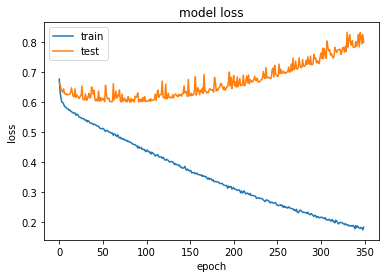

In [36]:
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [37]:
model_name = 'Emotion_Voice_Detection_Model7.h5'
save_dir = os.path.join(os.getcwd(), 'saved_models')
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at C:\Users\wesac\PycharmProjects\INNO Python Speech Emotion Analysis\Training\saved_models\Emotion_Voice_Detection_Model7.h5 


In [38]:
import json
model_json = model.to_json()
with open("model7.json", "w") as json_file:
    json_file.write(model_json)

In [39]:
# loading json and creating model
from tensorflow.keras import models as models
import keras
from keras.models import model_from_json
# json_file = open('model5.json', 'r')
# loaded_model_json = json_file.read()
# json_file.close()
# loaded_model = model_from_json(loaded_model_json)
# # load weights into new model
# loaded_model.load_weights("saved_models/Emotion_Voice_Detection_Model5.h5")
# print("Loaded model from disk")
loaded_model = tf.keras.models.load_model('saved_models/Emotion_Voice_Detection_Model7.h5')



# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
score = loaded_model.evaluate(x_testcnn, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
acc: 64.92%


In [40]:
preds = loaded_model.predict(x_testcnn, 
                         batch_size=32, 
                         verbose=1)

248/248 [==============================] - 1s 3ms/sample


In [41]:
preds

array([[5.37473440e-01, 4.62526530e-01],
       [7.48834983e-02, 9.25116539e-01],
       [1.23919666e-01, 8.76080334e-01],
       [2.25400683e-02, 9.77459908e-01],
       [6.41463876e-01, 3.58536154e-01],
       [4.89697456e-01, 5.10302544e-01],
       [8.93825889e-02, 9.10617352e-01],
       [1.23751409e-01, 8.76248598e-01],
       [2.09399134e-01, 7.90600896e-01],
       [8.76019537e-01, 1.23980463e-01],
       [6.83749318e-01, 3.16250622e-01],
       [3.06125730e-01, 6.93874240e-01],
       [9.91909087e-01, 8.09093565e-03],
       [1.04218289e-01, 8.95781755e-01],
       [3.10373795e-03, 9.96896267e-01],
       [8.69632423e-01, 1.30367547e-01],
       [6.79743886e-02, 9.32025611e-01],
       [9.99263346e-01, 7.36623304e-04],
       [9.99878526e-01, 1.21489866e-04],
       [8.59311998e-01, 1.40687943e-01],
       [2.85616159e-01, 7.14383841e-01],
       [3.35007727e-01, 6.64992273e-01],
       [2.71219928e-02, 9.72877979e-01],
       [4.47435938e-02, 9.55256402e-01],
       [9.987473

In [42]:
preds1=preds.argmax(axis=1)

In [43]:
preds1

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1], dtype=int64)

In [44]:
abc = preds1.astype(int).flatten()

In [45]:
predictions = (lb.inverse_transform((abc)))

In [46]:
preddf = pd.DataFrame({'predictedvalues': predictions})
preddf[:10]

,predictedvalues
0,negative
1,positive
2,positive
3,positive
4,negative
5,positive
6,positive
7,positive
8,positive
9,negative


In [47]:
actual=y_test.argmax(axis=1)
abc123 = actual.astype(int).flatten()
actualvalues = (lb.inverse_transform((abc123)))

In [48]:
actualdf = pd.DataFrame({'actualvalues': actualvalues})
actualdf[:10]

,actualvalues
0,positive
1,positive
2,positive
3,positive
4,negative
5,positive
6,positive
7,negative
8,positive
9,negative


In [49]:
finaldf = actualdf.join(preddf)
finaldf[10:40]

,actualvalues,predictedvalues
10,positive,negative
11,positive,positive
12,negative,negative
13,negative,positive
14,positive,positive
15,positive,negative
16,positive,positive
17,negative,negative
18,negative,negative
19,negative,negative
